# Aprendizado de Máquinas: Trabalho Final

In [2]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## 1. O Dataset

Para a realização deste trabalho foi utilizado o clássico dataset do [titanic](https://www.kaggle.com/competitions/titanic).

### 1.1 Importando os Dados

In [34]:
# import the train data
train = pd.read_csv('data/train.csv')

# the test data is split into two parts
# import the test data
test = pd.read_csv('data/test.csv')
# import the dataset with the classes
gender = pd.read_csv('data/gender_submission.csv')
# merge the test data with it's classes
test = pd.merge(test, gender, on='PassengerId')

# merge the train and test data to make the analysis
merged_df = train.append(test, ignore_index=True).set_index('PassengerId')
merged_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### 1.2. Preparação dos Dados para a Análise Exploratória

Inicialmente, foi removida coluna `Name` já que como é uma label, quase que análoga ao `PassengerId`, não será de muito uso para o modelo. Com um tratamento avançado seria possível tentar relacionar o sobrenome à família da pessoa. Porém há o caso de pessoas com o mesmo sobrenome advindas de famílias diferentes que não seria possível tratar.

In [60]:
merged_df = merged_df.drop('Name', axis=1)

Outra questão importante é a idade, que possui $263$ valores faltantes. Inicialmente para lidar com estes casos irei simplesmente substituir tais valores pela média de idade dos passageiros.

Mean Age of the Passengers: 29.881137667304014


<AxesSubplot:ylabel='Frequency'>

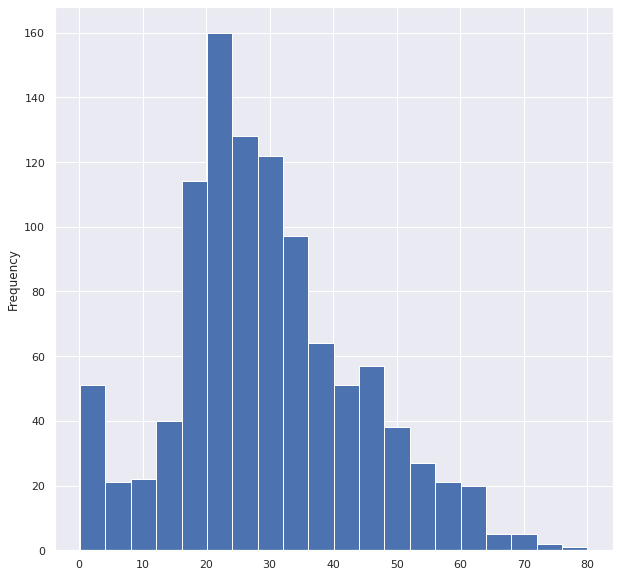

In [74]:
print(f'Mean Age of the Passengers: {merged_df["Age"].mean()}')
merged_df['Age'].plot(kind = 'hist', bins = 20)

In [77]:
merged_df['Age'] = merged_df['Age'].fillna(round(merged_df['Age'].mean(), 0))

### 1.3. Análise Exploratória

Agora examinando algumas métricas das colunas numéricas:

In [37]:
merged_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,0.377387,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.484918,0.837836,14.413493,1.041658,0.865560,51.758668
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Usando o método `pd.Series.value_counts()` conseguimos ver que o dataset de treino contém dados referentes à $494$ sobreviventes e $815$ pessoas que não sobreviveram.

0    815
1    494
Name: Survived, dtype: int64

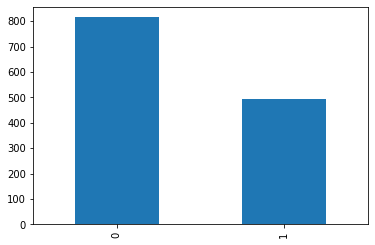

In [44]:
merged_df['Survived'].value_counts().plot(kind='bar')
merged_df['Survived'].value_counts()

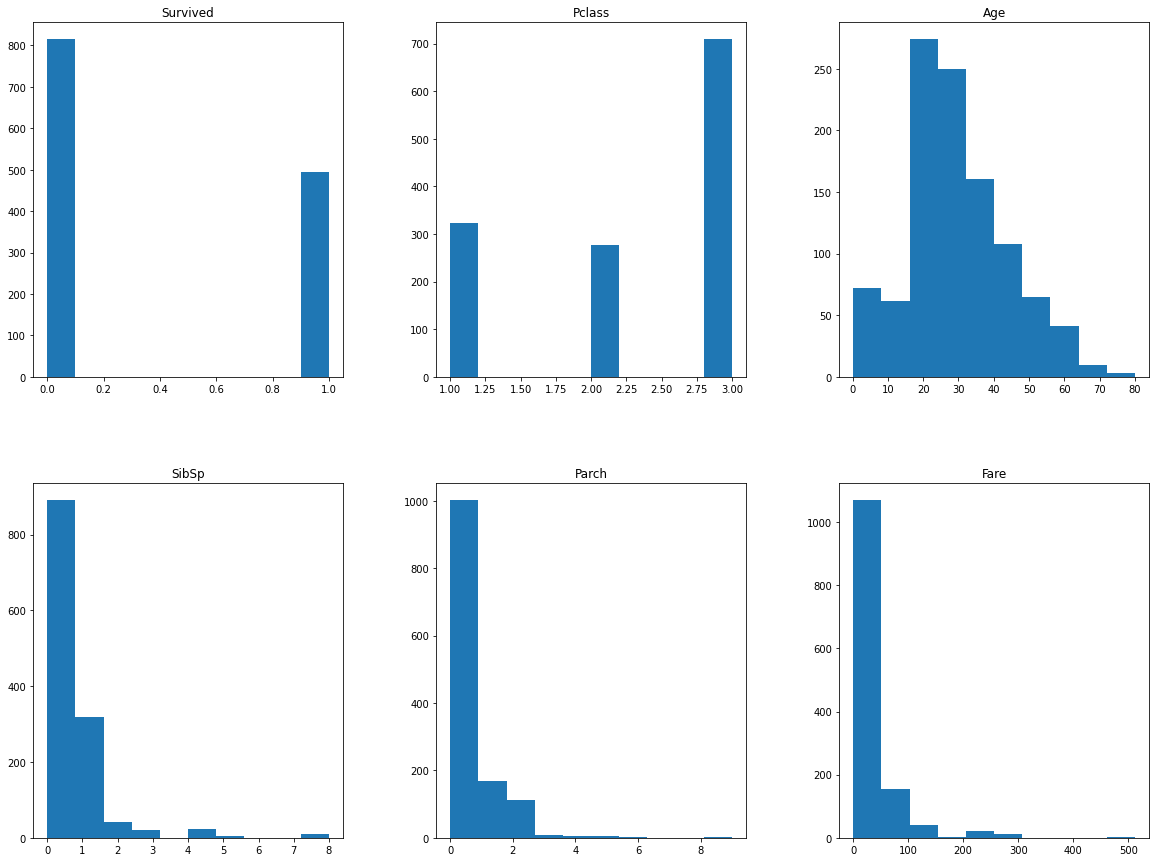

In [47]:
merged_df[['Pclass']].hist(
    bins = 10, 
    figsize=(20, 15), 
    grid=False, 
    sharex = False, 
    sharey=False,
    layout=(2, 3)
);

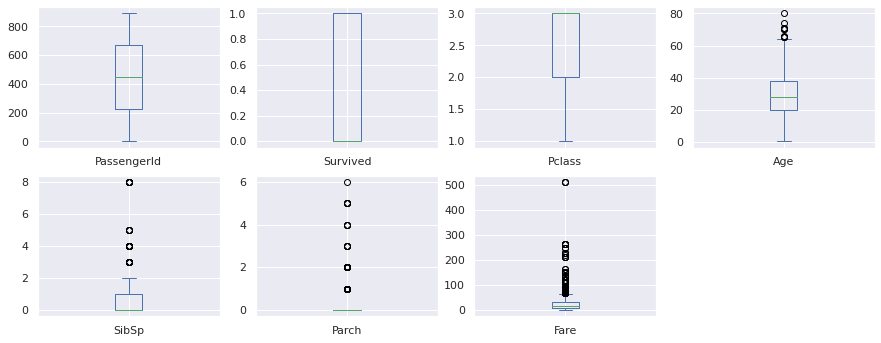

In [14]:
train.plot(kind='box', subplots=True, layout=(5, 4), sharex=False, sharey=False, figsize=(15, 15));

In [51]:
rs = np.random.RandomState(0)

# df = pd.DataFrame(rs.rand(20, 20))
corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.264710,-0.053695,0.002370,0.108919,0.233622
Pclass,-0.264710,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,-0.053695,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,0.002370,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.108919,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.233622,-0.558629,0.178740,0.160238,0.221539,1.000000


In [52]:
merged_df.corr().drop('Survived')['Survived']

Pclass   -0.264710
Age      -0.053695
SibSp     0.002370
Parch     0.108919
Fare      0.233622
Name: Survived, dtype: float64

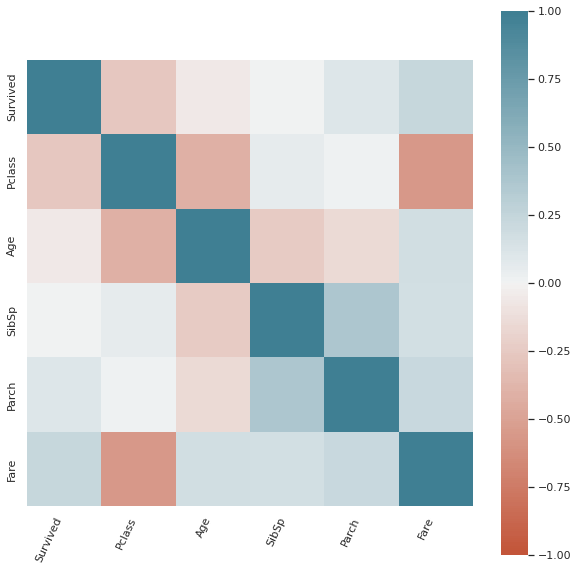

In [53]:
sns.set(rc={'figure.figsize':(10,10)})

ax = sns.heatmap(   corr, 
                    vmin=-1, vmax=1, center=0, 
                    cmap=sns.diverging_palette(20, 220, n=200), 
                    square=True
                )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=65,
    horizontalalignment='right'
);

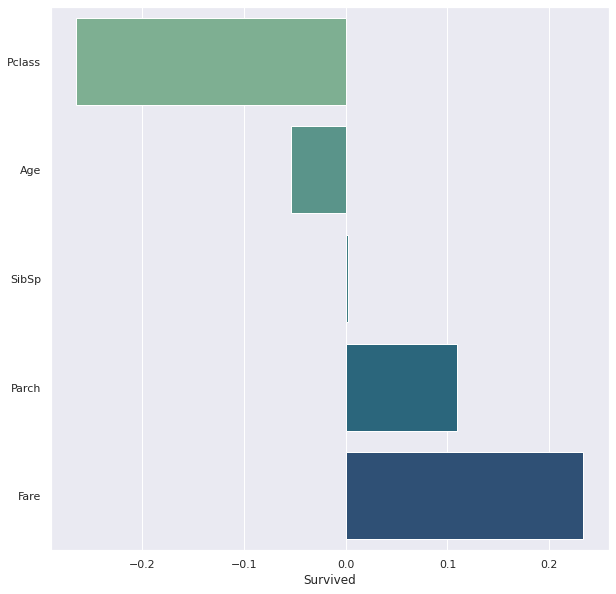

In [59]:
aux_corr = corr['Survived'].drop('Survived');
sns.barplot(
    x = aux_corr, 
    y = aux_corr.index, 
    palette='crest');

/home/gianlucca/.local/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/home/gianlucca/.local/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

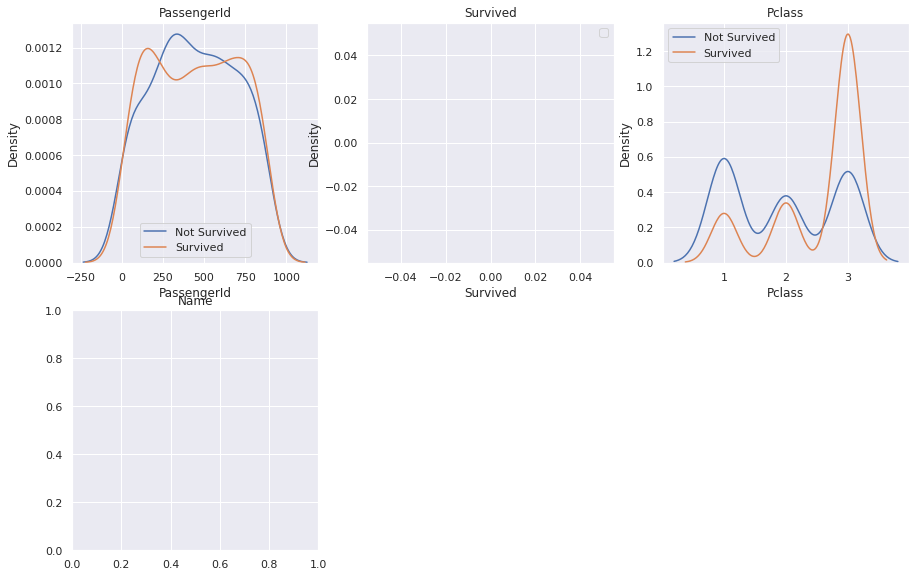

In [55]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

plt.figure(figsize = (15,15))
for ax,col in enumerate(train.columns[:9]):
    plt.subplot(3,3, ax + 1)
    plt.title(col)
    sns.kdeplot(x = survived[col], label="Not Survived")
    sns.kdeplot(x = not_survived[col], label="Survived")
    plt.legend()
plt.tight_layout()